https://www.w3schools.com/python/python_ml_auc_roc.asp

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

https://www.statology.org/plot-roc-curve-python/

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc


#ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a **classification model** at all **classification thresholds**. This curve plots two parameters:

**True Positive Rate**
**False Positive Rate**


**True Positive Rate (TPR)** is a synonym for [recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall) and is therefore defined as follows:

**$TPR = \frac{TP}{TP + FN} $**

**False Positive Rate (FPR)** is defined as follows:

**$FPR = \frac{FP}{FP + TN} $**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [6]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

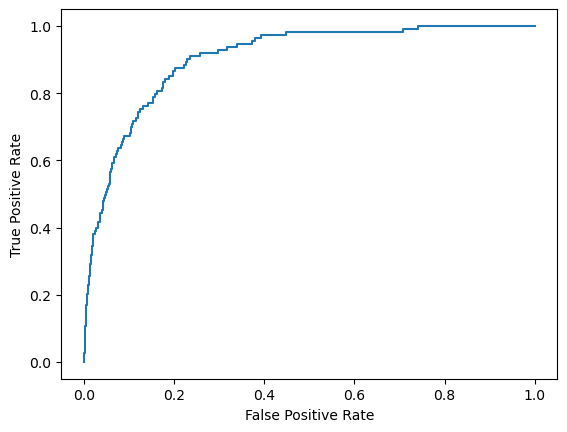

In [7]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

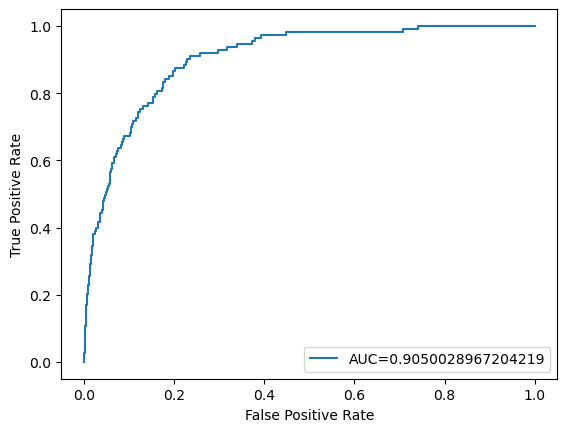

In [8]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()